## Exercise 1 - pandas repetition

#### 2. Olympic games data

#### We will not create a separate duckdb database in this exercise, instead we'll query a pandas dataframe directly and return a dataframe.

#### a) Start with reading in the dataset into a dataframe using pandas.

In [2]:
import pandas as pd

athlete_events_file_path = "data/athlete_events.csv"

athlete_events_df = pd.read_csv(
        athlete_events_file_path
        )

athlete_events_df.keys()

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [3]:
noc_file_path = "data/noc_regions.csv"

noc_df = pd.read_csv(
        noc_file_path
        )

noc_df.keys()

Index(['NOC', 'region', 'notes'], dtype='object')

In [4]:
noc_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


#### b) Now here is the code for using duckdb on pandas and it will return a df

In [5]:
import duckdb

my_df = duckdb.query(
    """
    SELECT * 
    FROM athlete_events_df
    """
    ).df()

In [6]:
my_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [8]:
# use duckdb to join dataframes
import duckdb

my_df = duckdb.query(
    """
    SELECT * 
    FROM athlete_events_df
    LEFT JOIN noc_df
    ON athlete_events_df.NOC = noc_df.NOC
    """
    ).df()

In [9]:
my_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,NOC_1,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,DEN,Denmark,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,None


#### c) Use pandas columns method to find out the columns

In [10]:
my_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'NOC_1', 'region',
       'notes'],
      dtype='object')

####  d) Find out the 10 oldest atheletes, their age and the sport

In [11]:
oldest_athletes_top10 = duckdb.query(
    """
    SELECT Name, Age, Sport
    FROM athlete_events_df
    ORDER BY Age DESC
    LIMIT 10
    """
    ).df()

In [12]:
oldest_athletes_top10

,Name,Age,Sport
0,John Quincy Adams Ward,97.0,Art Competitions
1,Winslow Homer,96.0,Art Competitions
2,Thomas Cowperthwait Eakins,88.0,Art Competitions
3,Thomas Cowperthwait Eakins,88.0,Art Competitions
4,Thomas Cowperthwait Eakins,88.0,Art Competitions
5,George Denholm Armour,84.0,Art Competitions
6,Louis Tauzin,81.0,Art Competitions
7,Robert Tait McKenzie,81.0,Art Competitions
8,Max Liebermann,80.0,Art Competitions
9,Max Liebermann,80.0,Art Competitions


####  e) Find out the 10 youngest atheletes, their age and the sport

In [13]:
youngest_atheletes_top10 = duckdb.query(
    """
    SELECT Name, Age, Sport
    FROM athlete_events_df
    ORDER BY Age ASC
    LIMIT 10
    """
    ).df()

In [14]:
youngest_atheletes_top10

,Name,Age,Sport
0,Dimitrios Loundras,10.0,Gymnastics
1,Megan Olwen Devenish Taylor (-Mandeville-Ellis),11.0,Figure Skating
2,Liana Vicens,11.0,Swimming
3,Liana Vicens,11.0,Swimming
4,Liana Vicens,11.0,Swimming
5,Liana Vicens,11.0,Swimming
6,Etsuko Inada,11.0,Figure Skating
7,Liu Luyang,11.0,Figure Skating
8,Marcelle Matthews,11.0,Figure Skating
9,Magdalena Cecilia Colledge,11.0,Figure Skating


#### f) Find out the five sports with highest median age

In [17]:
highest_median_age_top5 = duckdb.query(
    """
    SELECT Sport, MEDIAN(Age) 
    FROM athlete_events_df
    GROUP BY Sport 
    ORDER BY MEDIAN(Age) DESC
    LIMIT 5
    """
    ).df()

In [18]:
highest_median_age_top5

,Sport,median(Age)
0,Roque,59.0
1,Art Competitions,45.0
2,Alpinism,38.0
3,Polo,35.0
4,Croquet,33.0


#### g) Find out the five sports with lowest median age

In [19]:
lowest_median_age_top5 = duckdb.query(
    """
    SELECT Sport, MEDIAN(Age) 
    FROM athlete_events_df
    GROUP BY Sport 
    ORDER BY MEDIAN(Age) ASC
    LIMIT 5
    """
    ).df()

In [20]:
lowest_median_age_top5

,Sport,median(Age)
0,Rhythmic Gymnastics,18.0
1,Swimming,20.0
2,Gymnastics,22.0
3,Figure Skating,22.0
4,Synchronized Swimming,22.0


#### h) Find out top 10 countries after number of gold medals

In [22]:
my_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'NOC_1', 'region',
       'notes'],
      dtype='object')

In [44]:
my_df[['Name',"Medal"]].head()

,Name,Medal
0,A Dijiang,None
1,A Lamusi,None
2,Gunnar Nielsen Aaby,None
3,Edgar Lindenau Aabye,Gold
4,Christine Jacoba Aaftink,None


In [45]:
max_gold_medals_top10 = duckdb.query(
    """
    SELECT NOC, COUNT(Medal)
    FROM athlete_events_df
    WHERE Medal in ['Gold']
    GROUP BY NOC
    ORDER BY COUNT(Medal) DESC
    LIMIT 10
    """
    ).df()

In [46]:
max_gold_medals_top10

,NOC,count(Medal)
0,USA,2638
1,URS,1082
2,GER,745
3,GBR,678
4,ITA,575
5,FRA,501
6,SWE,479
7,CAN,463
8,HUN,432
9,GDR,397


#### i) Find out top 10 countries after number of medals

In [36]:
#type(athlete_events_df["Medal"])
athlete_events_df["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [42]:
country_medals_top10 = duckdb.query(
    """
    SELECT NOC, COUNT(Medal)
    FROM athlete_events_df
    WHERE Medal in ['Gold', 'Bronze', 'Silver']
    GROUP BY NOC
    ORDER BY COUNT(Medal) DESC
    LIMIT 10
    """
    ).df()

In [43]:
country_medals_top10

,NOC,count(Medal)
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


#### j) Plot a time series line chart of number of female and male atheletes in same graph.

In [47]:
my_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'NOC_1', 'region',
       'notes'],
      dtype='object')

In [62]:
type(my_df["Sex"].iloc[1])

str

In [67]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [79]:
year_male_female_df = duckdb.query(
    """
    SELECT Year, Sex, COUNT(Sex)
    FROM athlete_events_df
    WHERE Sex in ['M', 'F']
    GROUP BY Year, Sex
    ORDER BY Year ASC
    """
    ).df()

In [81]:
year_male_female_df.head()



,Year,Sex,count(Sex)
0,1896,M,380
1,1900,M,1903
2,1900,F,33
3,1904,F,16
4,1904,M,1285


In [83]:
# Pivoting the DataFrame
pivoted_year_male_female_df = year_male_female_df.pivot_table(
    index='Year', 
    columns='Sex', 
    values='count(Sex)', 
    aggfunc='sum')

In [84]:
# Resetting the index to turn 'year' into a column
pivoted_year_male_female_df = pivoted_year_male_female_df.reset_index()

In [89]:
# Renaming the columns
pivoted_year_male_female_df.columns.name = None  # Remove the column name
pivoted_year_male_female_df.rename(columns={'F': 'number of females', 'M': 'number of males'}, inplace=True)

# Display the result
pivoted_year_male_female_df.head()

,Year,number of females,number of males
0,1896,NaN,380.0
1,1900,33.0,1903.0
2,1904,16.0,1285.0
3,1906,11.0,1722.0
4,1908,47.0,3054.0


**pandas plot() method**

[Text(0.5, 0, 'year'), Text(0, 0.5, 'number of atheletes')]

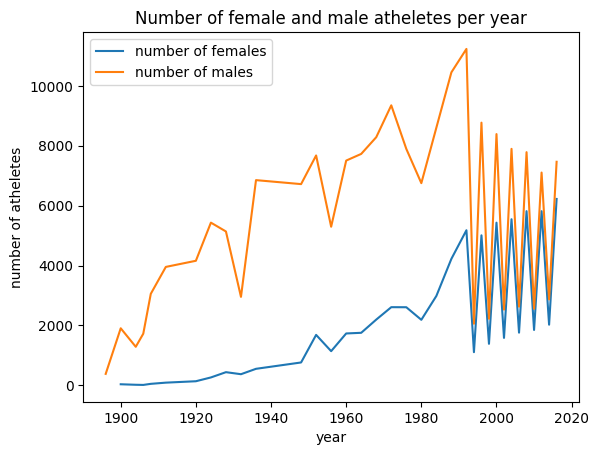

In [86]:
ax = pivoted_year_male_female_df.plot(
    x = 'Year',
    kind = "line",  
    title = "Number of female and male atheletes per year",
    rot = 0,
    fontsize = 10
    )
ax.set(xlabel = "year", 
       ylabel = "number of atheletes")

<Axes: xlabel='Year', ylabel='count'>

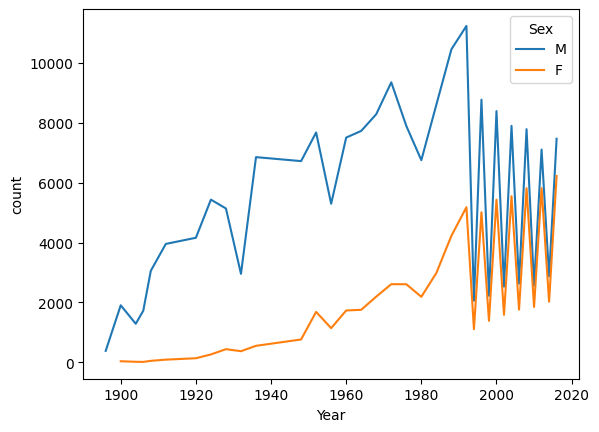

In [90]:
# another solution from John
import seaborn as sns

new_df = duckdb.query(
    """
                      SELECT 
                      Year, Sex, count(Sex) as count 
                      FROM athlete_events_df 
                      group by Year, Sex 
                      ORDER BY Year ASC
                      """
).df()
new_df
sns.lineplot(new_df, x=new_df["Year"], y=new_df["count"], hue="Sex")

#### h) Do more explorations on your own